In [1]:
import sys 
sys.path.append('../')
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np
import torch.nn.functional as F
import scipy
import pandas as pd
import os
import glob
import scienceplots
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.style.use('science')
pd.set_option('display.float_format', lambda x: '%.4e' % x)
# import seaborn as sns
from utils import create_expdf, fetch_subdf
from dataset.generate_dataset_1d import poisson_kernel, logarithm_kernel
from mpl_toolkits.axes_grid1 import make_axes_locatable

Result of GN and GN-aug on 1D problems

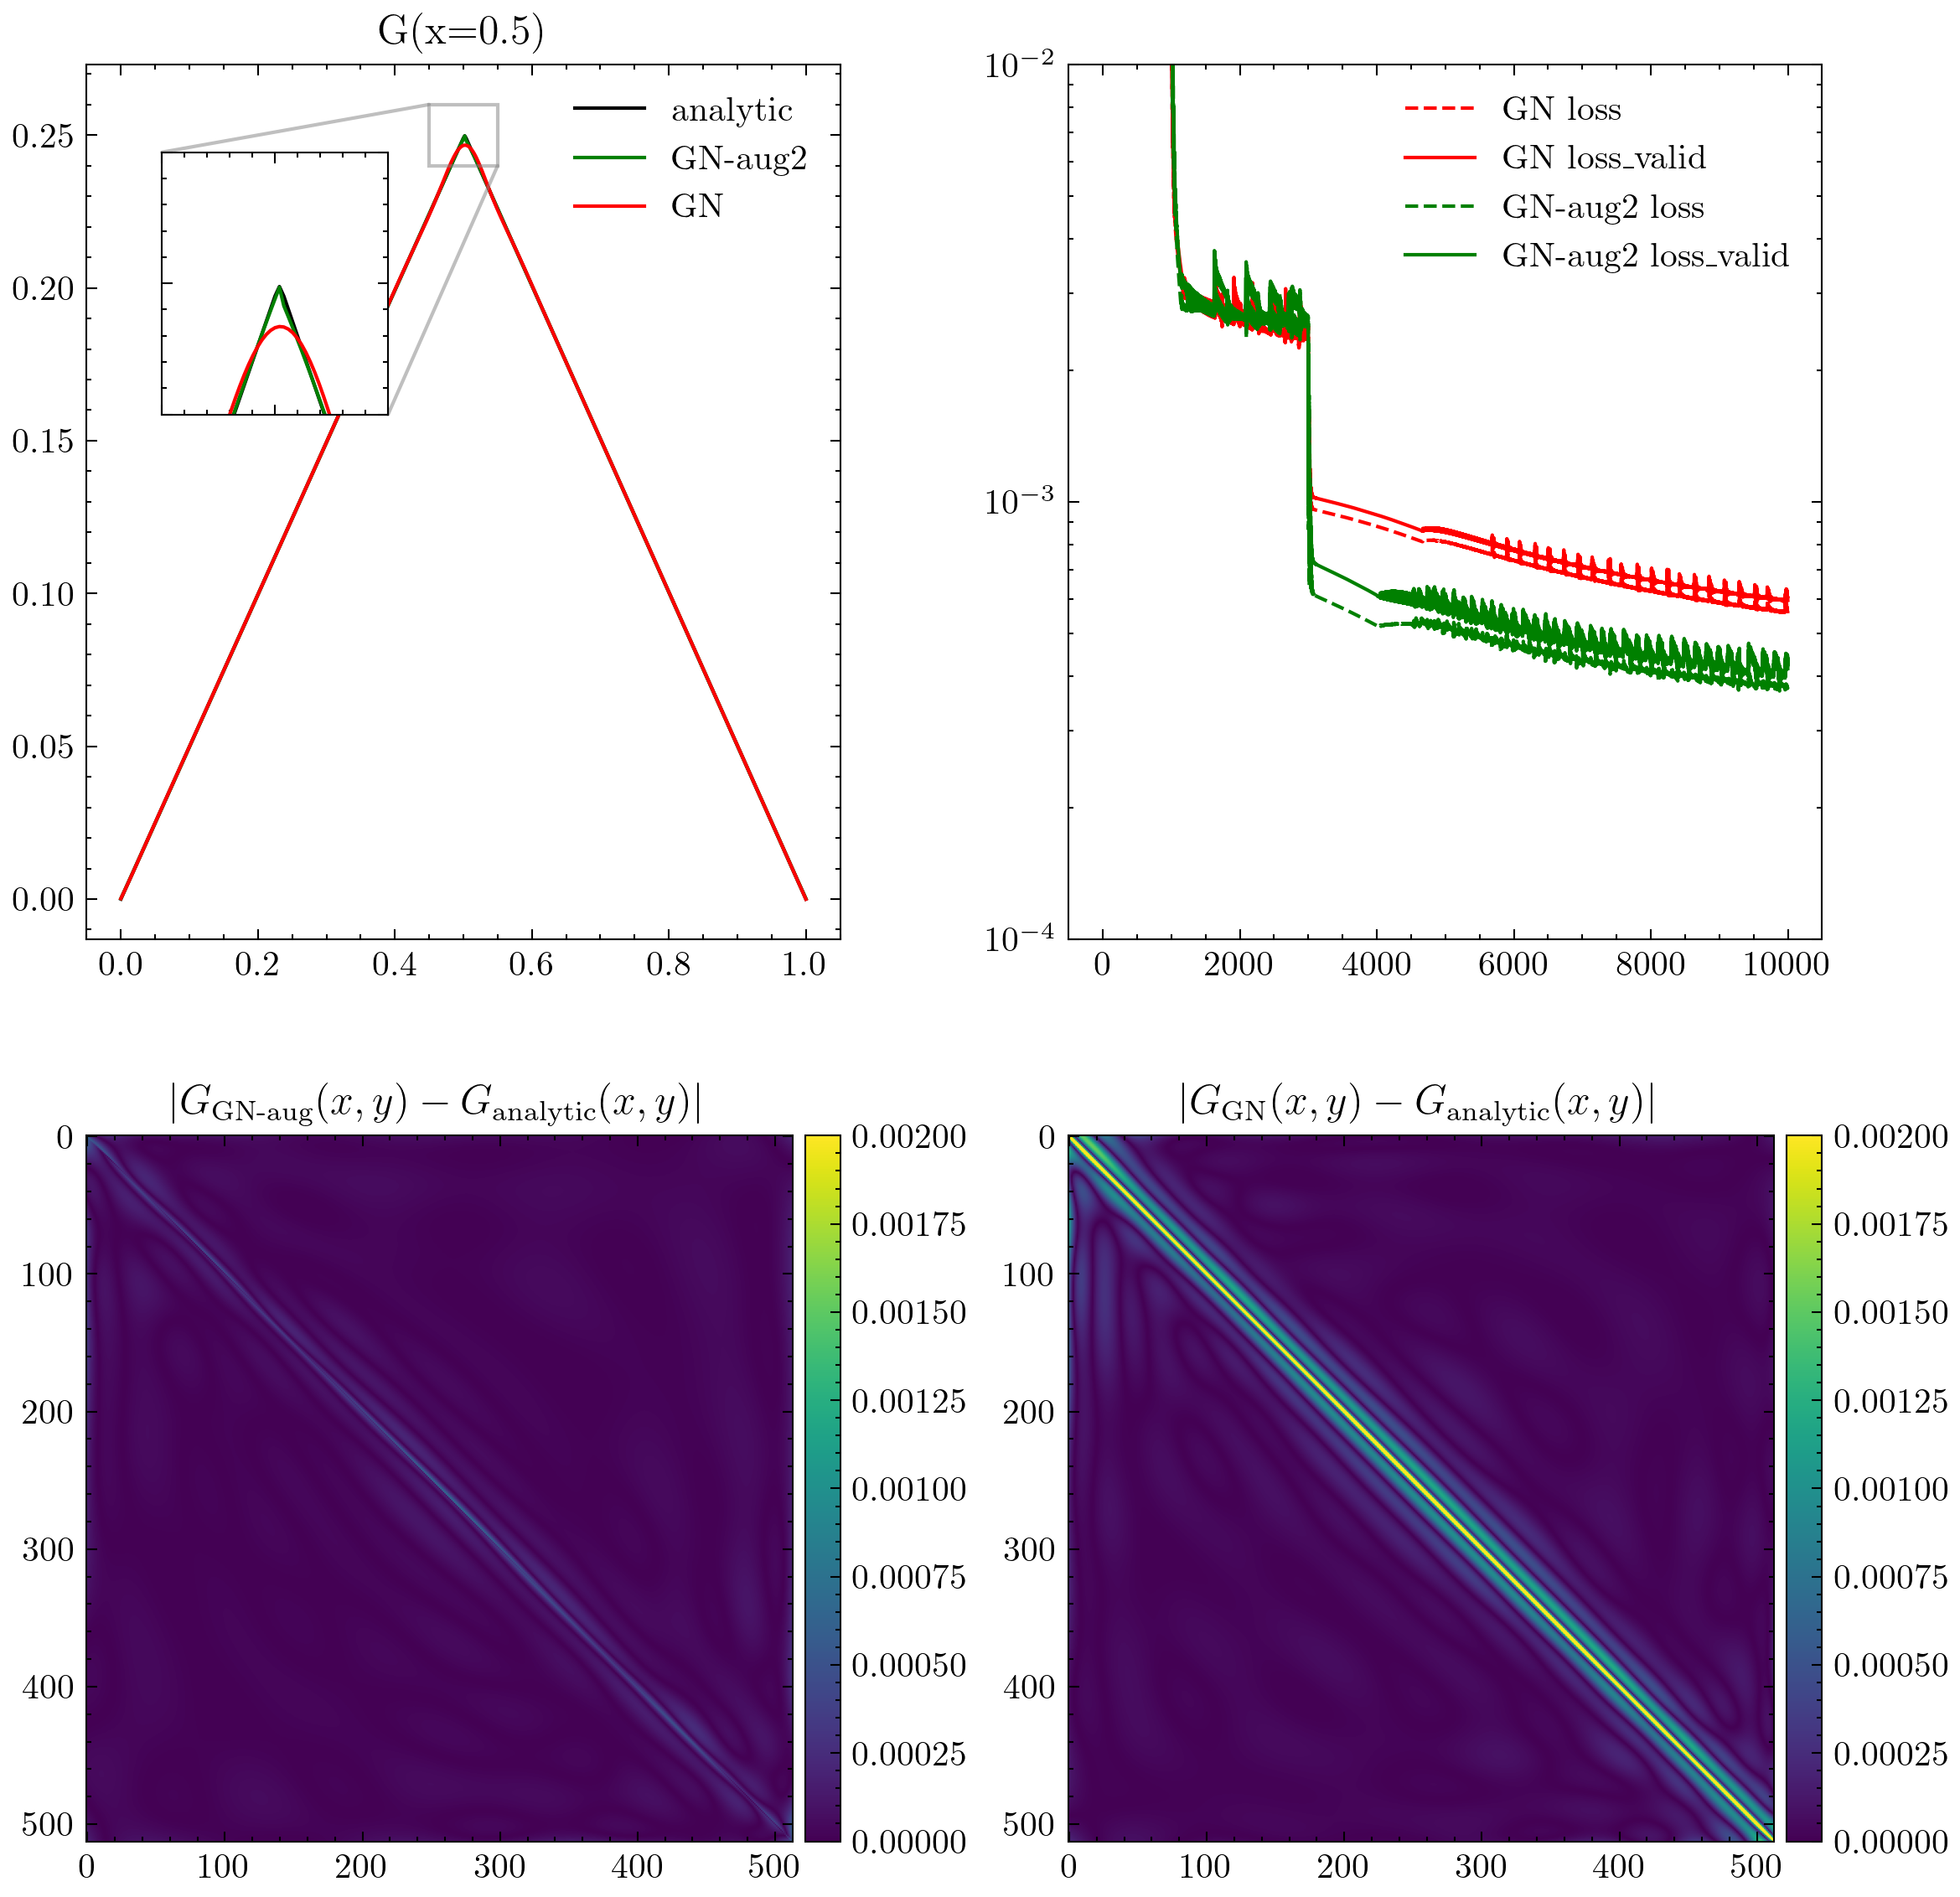

In [3]:
gn_poisson_df = pd.read_csv('../results/poisson/GN1D-rational-513-50-1.0000-none-2/hist.csv')
# gnaug1_poisson_df = pd.read_csv('../results/poisson/GN1D-rational-513-50-1.0000-aug1-0/hist.csv')
gnaug2_poisson_df = pd.read_csv('../results/poisson/GN1D-rational-513-50-1.0000-aug2-2/hist.csv')
gn_poisson_kernel = np.load('../results/poisson/GN1D-rational-513-50-1.0000-none-2/approx_kernel.npy')
# gnaug1_poisson_kernel = np.load('../results/poisson/GN1D-rational-513-50-1.0000-aug1-0/approx_kernel.npy')
gnaug2_poisson_kernel = np.load('../results/poisson/GN1D-rational-513-50-1.0000-aug2-2/approx_kernel.npy')

idx = 257
nh = 513
h = 1/(nh-1) # x in [-1, 1]
xh = torch.linspace(0,1,nh)
x_i = torch.cartesian_prod(xh, xh)
G = poisson_kernel(x_i[:,0], x_i[:,1], h).reshape(nh, nh)
G_gn = gn_poisson_kernel.reshape(513,513) / h
G_gnaug2 = gnaug2_poisson_kernel.reshape(513,513) / h
# G_gnaug1 = gnaug1_poisson_kernel.reshape(513,513) / h

G_ = G[idx]
G_gn_ = G_gn[idx]
# G_gnaug1_ = G_gnaug1[idx]
G_gnaug2_ = G_gnaug2[idx]

f = plt.figure(figsize=(8,8))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)
ax1.plot(xh, G_, '-k',label='analytic')
# ax1.plot(xh, G_gnaug1_, '-b',label='GN-aug1')
ax1.plot(xh, G_gnaug2_, '-g',label='GN-aug2')
ax1.plot(xh, G_gn_, '-r', label='GN')
ax1.title.set_text('G(x=0.5)')
axins = ax1.inset_axes(
    [0.1, 0.6, 0.3, 0.3], xlim=(0.45, 0.55),ylim=(0.24,0.26),
    xticklabels=[], yticklabels=[])
axins.plot(xh, G_, '-k', label='analytic')
# axins.plot(xh, G_gnaug1_, '-b', label='GN-aug1')
axins.plot(xh, G_gnaug2_, '-g', label='GN-aug2')
axins.plot(xh, G_gn_, '-r', label='GN')
ax1.indicate_inset_zoom(axins)
ax1.legend()

start = 0
end = 10000
idx = list(range(start, end, 1))
ax2.set_ylim(10**(-4), 10**(-2))
ax2.set_yscale("log")
# plt.xscale("log")
ax2.plot(idx, gn_poisson_df.train_rl2[start:end], label = "GN loss", color='red', linestyle='--')
ax2.plot(idx, gn_poisson_df.test_rl2[start:end], label = "GN loss_valid", color='red', linestyle='-')
# ax2.plot(idx, gnaug1_poisson_df.train_rl2[start:end], label = "GN-aug1 loss", color='blue', linestyle='--')
# ax2.plot(idx, gnaug1_poisson_df.test_rl2[start:end], label = "GN-aug1 loss_valid", color='blue', linestyle='-')
ax2.plot(idx, gnaug2_poisson_df.train_rl2[start:end], label = "GN-aug2 loss", color='green', linestyle='--')
ax2.plot(idx, gnaug2_poisson_df.test_rl2[start:end], label = "GN-aug2 loss_valid", color='green', linestyle='-')
ax2.legend()
ax2.minorticks_on()

G_gnaug2_ae = np.abs(G - G_gnaug2)
G_gn_ae = np.abs(G - G_gn)
im3 = ax3.imshow(G_gnaug2_ae, vmin=0, vmax=2e-3)
ax3.title.set_text('$|G_{\\text{GN-aug}}(x,y)-G_{\\text{analytic}}(x,y)|$')
divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
f.colorbar(im3, cax=cax, orientation='vertical')

im4 = ax4.imshow(G_gn_ae, vmin=0, vmax=2e-3)
ax4.title.set_text('$|G_{\\text{GN}}(x,y)-G_{\\text{analytic}}(x,y)|$')
divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)
f.colorbar(im4, cax=cax, orientation='vertical')

plt.tight_layout()

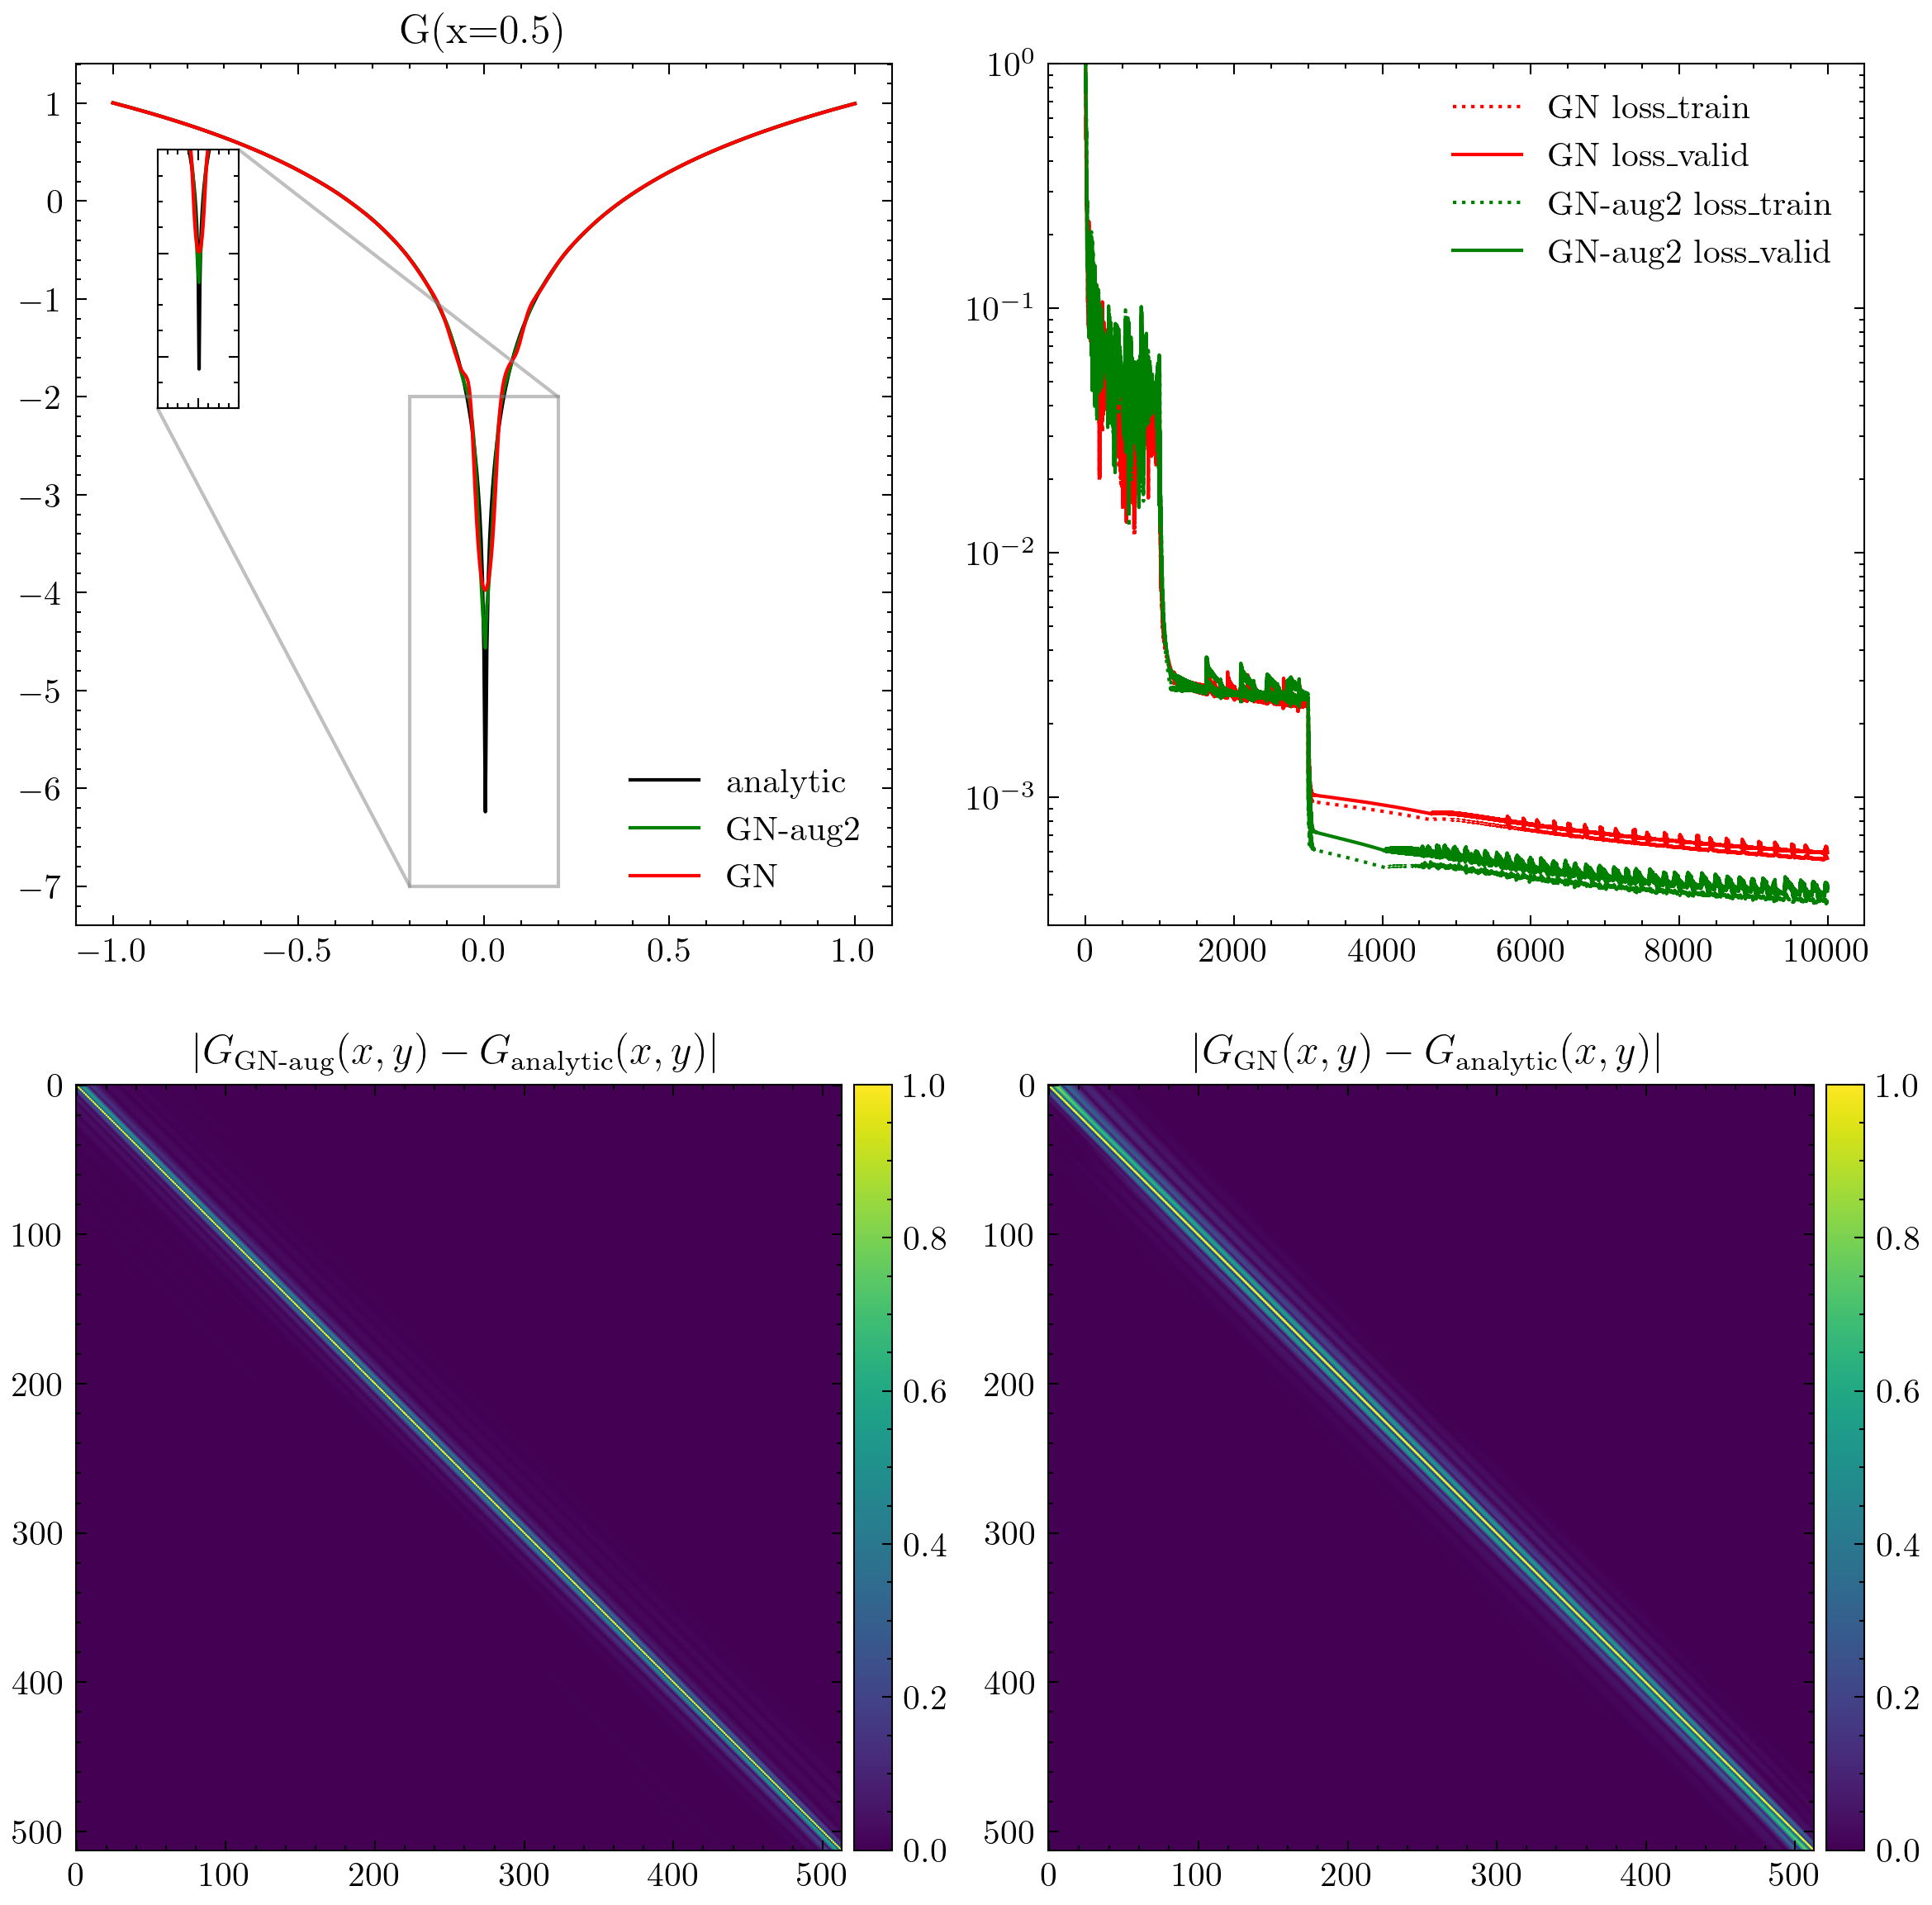

In [11]:
gn_log_df = pd.read_csv('../results/logarithm/GN1D-rational-513-50-1.0000-none-1/hist.csv')
# gnaug1_poisson_df = pd.read_csv('../results/poisson/GN1D-rational-513-50-1.0000-aug1-0/hist.csv')
gnaug2_log_df = pd.read_csv('../results/logarithm/GN1D-rational-513-50-1.0000-aug2-1/hist.csv')
gn_log_kernel = np.load('../results/logarithm/GN1D-rational-513-50-1.0000-none-1/approx_kernel.npy')
# gnaug1_poisson_kernel = np.load('../results/poisson/GN1D-rational-513-50-1.0000-aug1-0/approx_kernel.npy')
gnaug2_log_kernel = np.load('../results/logarithm/GN1D-rational-513-50-1.0000-aug2-1/approx_kernel.npy')

idx = 257
nh = 513
h = 2/(nh-1) # x in [-1, 1]
xh = torch.linspace(-1,1,nh)
x_i = torch.cartesian_prod(xh, xh)
G = logarithm_kernel(x_i[:,0], x_i[:,1], h).reshape(nh, nh)
G_gn = gn_log_kernel.reshape(513,513) / h
G_gnaug2 = gnaug2_log_kernel.reshape(513,513) / h
# G_gnaug1 = gnaug1_poisson_kernel.reshape(513,513) / h

G_ = G[idx]
G_gn_ = G_gn[idx]
# G_gnaug1_ = G_gnaug1[idx]
G_gnaug2_ = G_gnaug2[idx]

f = plt.figure(figsize=(8,8))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)
ax1.plot(xh, G_, '-k',label='analytic')
# ax1.plot(xh, G_gnaug1_, '-b',label='GN-aug1')
ax1.plot(xh, G_gnaug2_, '-g',label='GN-aug2')
ax1.plot(xh, G_gn_, '-r', label='GN')
ax1.title.set_text('G(x=0.5)')
axins = ax1.inset_axes(
    [0.1, 0.6, 0.1, 0.3], xlim=(-0.2, 0.2),ylim=(-7,-2),
    xticklabels=[], yticklabels=[])
axins.plot(xh, G_, '-k', label='analytic')
# axins.plot(xh, G_gnaug1_, '-b', label='GN-aug1')
axins.plot(xh, G_gnaug2_, '-g', label='GN-aug2')
axins.plot(xh, G_gn_, '-r', label='GN')
ax1.indicate_inset_zoom(axins)
ax1.legend()

start = 0
end = 10000
idx = list(range(start, end, 1))
ax2.set_ylim(3e-4, 1)
ax2.set_yscale("log")
# ax2.set_xscale("log")
ax2.plot(idx, gn_poisson_df.train_rl2[start:end], label = "GN loss_train", color='red', linestyle=':')
ax2.plot(idx, gn_poisson_df.test_rl2[start:end], label = "GN loss_valid", color='red', linestyle='-')
# ax2.plot(idx, gnaug1_poisson_df.train_rl2[start:end], label = "GN-aug1 loss", color='blue', linestyle='--')
# ax2.plot(idx, gnaug1_poisson_df.test_rl2[start:end], label = "GN-aug1 loss_valid", color='blue', linestyle='-')
ax2.plot(idx, gnaug2_poisson_df.train_rl2[start:end], label = "GN-aug2 loss_train", color='green', linestyle=':')
ax2.plot(idx, gnaug2_poisson_df.test_rl2[start:end], label = "GN-aug2 loss_valid", color='green', linestyle='-')
ax2.legend()
ax2.minorticks_on()

G_gnaug2_ae = np.abs(G - G_gnaug2)
G_gn_ae = np.abs(G - G_gn)
im3 = ax3.imshow(G_gnaug2_ae, vmin=0, vmax=1)
ax3.title.set_text('$|G_{\\text{GN-aug}}(x,y)-G_{\\text{analytic}}(x,y)|$')
divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
f.colorbar(im3, cax=cax, orientation='vertical')

im4 = ax4.imshow(G_gn_ae, vmin=0, vmax=1)
ax4.title.set_text('$|G_{\\text{GN}}(x,y)-G_{\\text{analytic}}(x,y)|$')
divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)
f.colorbar(im4, cax=cax, orientation='vertical')

plt.tight_layout()

Result of GN with subset training points

In [15]:
gnaug_poisson_df_p_lst = []
gn_poisson_df_p_lst = []
gnaug_log_df_p_lst = []
gn_log_df_p_lst = []

gnaug_poisson_df_pattern = '../results/poisson/GN1D-rational-513-50-{:}-aug2-1/hist.csv'
gn_poisson_df_pattern = '../results/poisson/GN1D-rational-513-50-{:}-none-1/hist.csv'
gnaug_log_df_pattern = '../results/logarithm/GN1D-rational-513-50-{:}-aug2-1/hist.csv'
gn_log_df_pattern = '../results/logarithm/GN1D-rational-513-50-{:}-none-1/hist.csv'

ps = [0.01, 0.03, 0.05, 0.07, 0.1, 0.15, 0.25, 0.30, 0.4, 0.5, 0.7, 0.9, 1.0]
for p in ps:
    p = '{:.4f}'.format(p)
    gnaug_poisson_df_p_lst.append(pd.read_csv(gnaug_poisson_df_pattern.format(p)).test_rl2.values[-1])
    gn_poisson_df_p_lst.append(pd.read_csv(gn_poisson_df_pattern.format(p)).test_rl2.values[-1])
    gnaug_log_df_p_lst.append(pd.read_csv(gnaug_log_df_pattern.format(p)).test_rl2.values[-1])
    gn_log_df_p_lst.append(pd.read_csv(gn_log_df_pattern.format(p)).test_rl2.values[-1])

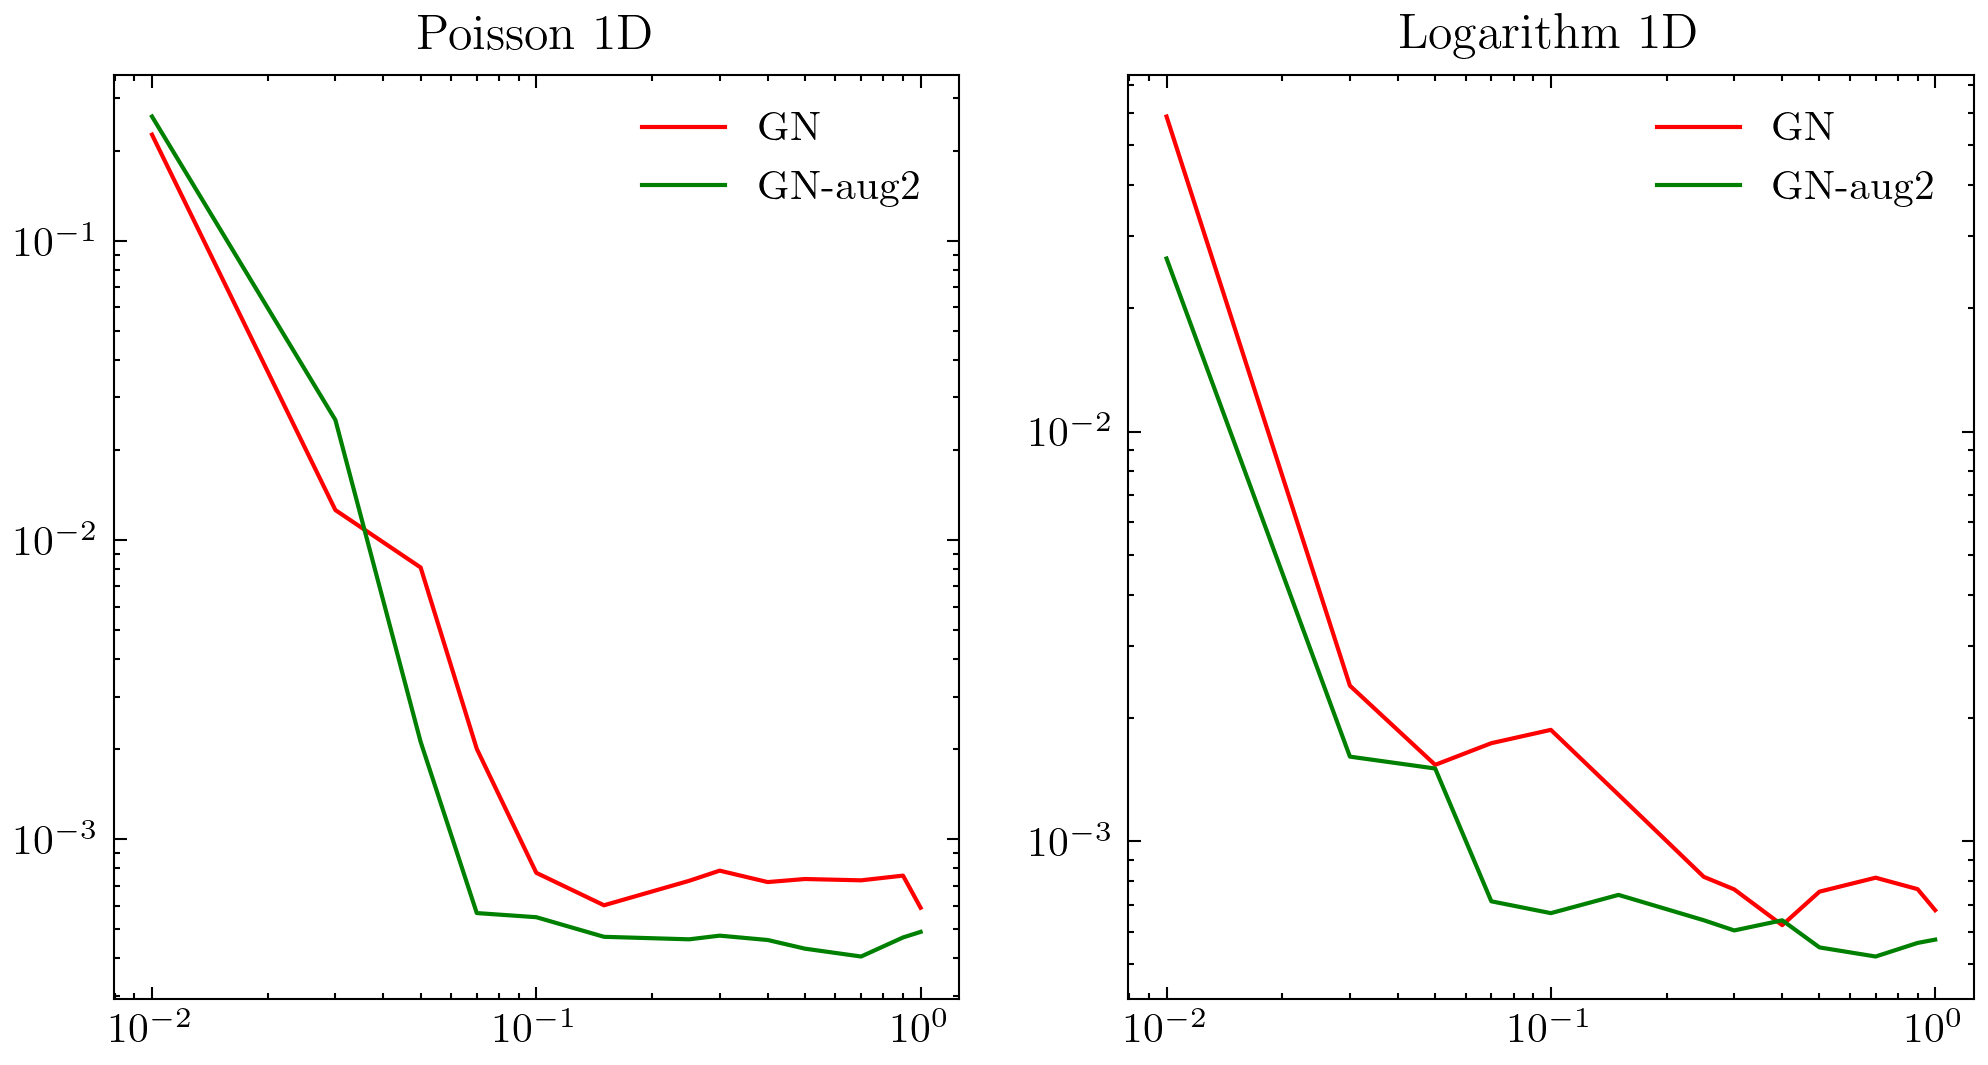

In [16]:
f = plt.figure(figsize=(8,4))
ax_poisson = f.add_subplot(121)
ax_log = f.add_subplot(122)
ax_poisson.plot(ps, gn_poisson_df_p_lst, '-r', label='GN')
ax_poisson.plot(ps, gnaug_poisson_df_p_lst, '-g', label='GN-aug2')
ax_poisson.set_yscale("log")
ax_poisson.set_xscale("log")
ax_poisson.legend()
ax_poisson.minorticks_on()
ax_poisson.title.set_text("Poisson 1D")
ax_log.plot(ps, gn_log_df_p_lst, '-r', label='GN')
ax_log.plot(ps, gnaug_log_df_p_lst, '-g', label='GN-aug2')
ax_log.set_yscale("log")
ax_log.set_xscale("log")
ax_log.legend()
ax_log.minorticks_on()
ax_log.title.set_text('Logarithm 1D')

In [106]:
(100+10+300+8+500+250+5+8)

1181

In [2]:
exp_df = create_expdf('../results')

In [3]:
gn1d_cosine = fetch_subdf(exp_df, task_nm='cosine', model_nm='GN1D')
gn1d_logarithm = fetch_subdf(exp_df, task_nm='logarithm', model_nm='GN1D')

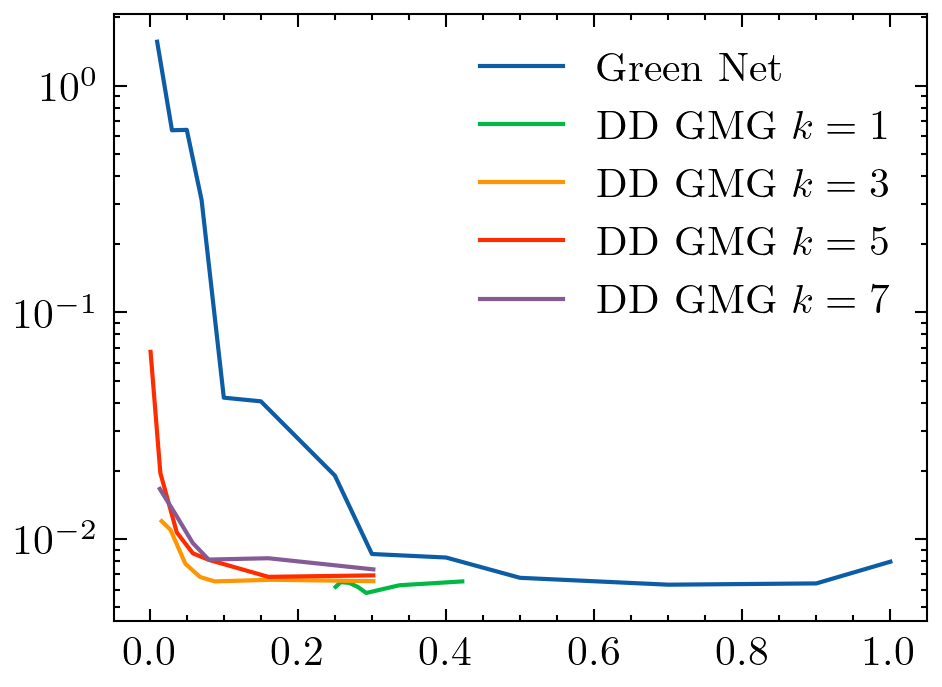

In [4]:
gn1d_expdecay = fetch_subdf(exp_df, task_nm='expdecay', model_nm='GN1D')
ddgmg1d_expdecay_k1 = fetch_subdf(exp_df, task_nm='expdecay', model_nm='DD_GMGN1D', k=1)
ddgmg1d_expdecay_k3 = fetch_subdf(exp_df, task_nm='expdecay', model_nm='DD_GMGN1D', k=3)
ddgmg1d_expdecay_k5 = fetch_subdf(exp_df, task_nm='expdecay', model_nm='DD_GMGN1D', k=5)
ddgmg1d_expdecay_k7 = fetch_subdf(exp_df, task_nm='expdecay', model_nm='DD_GMGN1D', k=7)

plt.plot(gn1d_expdecay.p, gn1d_expdecay.rl2, label='Green Net')
plt.plot(ddgmg1d_expdecay_k1.p, ddgmg1d_expdecay_k1.rl2, label='DD GMG $k=1$')
plt.plot(ddgmg1d_expdecay_k3.p, ddgmg1d_expdecay_k3.rl2, label='DD GMG $k=3$')
plt.plot(ddgmg1d_expdecay_k5.p, ddgmg1d_expdecay_k5.rl2, label='DD GMG $k=5$')
plt.plot(ddgmg1d_expdecay_k7.p, ddgmg1d_expdecay_k7.rl2, label='DD GMG $k=7$')
# plt.ylim([5e-4, 5e-3])
# plt.xlim([0, .5])

plt.legend()
plt.yscale('log')

In [7]:
gn2d_poisson = fetch_subdf(exp_df, task_nm='poisson', model_nm='GN2D')
ddgmg2d_poisson_k1 = fetch_subdf(exp_df, task_nm='poisson', model_nm='DD_GMGN2D', k=1)
ddgmg2d_poisson_k3 = fetch_subdf(exp_df, task_nm='poisson', model_nm='DD_GMGN2D', k=3)
ddgmg2d_poisson_k2 = fetch_subdf(exp_df, task_nm='poisson', model_nm='DD_GMGN2D', k=2)
# ddgmg2d_poisson_k7 = fetch_subdf(exp_df, task_nm='poisson', model_nm='DD_GMGN2D', k=7)

In [8]:
gn2d_poisson

,task_nm,model_nm,act,res,h,k,m,p,seed,rl2
255,poisson,GN2D,relu,65x65,50,0,0,5.0000e-03,0,2.4809e-01
256,poisson,GN2D,relu,65x65,50,0,0,3.0000e-02,0,7.0680e-02
257,poisson,GN2D,relu,65x65,50,0,0,5.0000e-02,0,3.8360e-02
258,poisson,GN2D,relu,65x65,50,0,0,1.0000e-01,0,3.2876e-02
259,poisson,GN2D,relu,65x65,50,0,0,1.5000e-01,0,3.0561e-02
260,poisson,GN2D,relu,65x65,50,0,0,2.5000e-01,0,2.8742e-02
261,poisson,GN2D,relu,65x65,50,0,0,3.0000e-01,0,2.9647e-02
262,poisson,GN2D,relu,65x65,50,0,0,4.0000e-01,0,2.9755e-02
263,poisson,GN2D,relu,65x65,50,0,0,5.0000e-01,0,3.1214e-02
264,poisson,GN2D,relu,65x65,50,0,0,1.0000e+00,0,2.9527e-02


In [11]:
ddgmg2d_poisson_k3

,task_nm,model_nm,act,res,h,k,m,p,seed,rl2
230,poisson,DD_GMGN2D,relu,65x65,50,3,0,4.0000e-04,0,2.4442e-01
231,poisson,DD_GMGN2D,relu,65x65,50,3,1,4.5000e-03,0,5.3076e-02
233,poisson,DD_GMGN2D,relu,65x65,50,3,3,3.6900e-02,0,3.1999e-02
234,poisson,DD_GMGN2D,relu,65x65,50,3,5,9.4200e-02,0,2.8594e-02
235,poisson,DD_GMGN2D,relu,65x65,50,3,7,1.6910e-01,0,2.8538e-02
232,poisson,DD_GMGN2D,relu,65x65,50,3,15,5.3570e-01,0,2.9382e-02


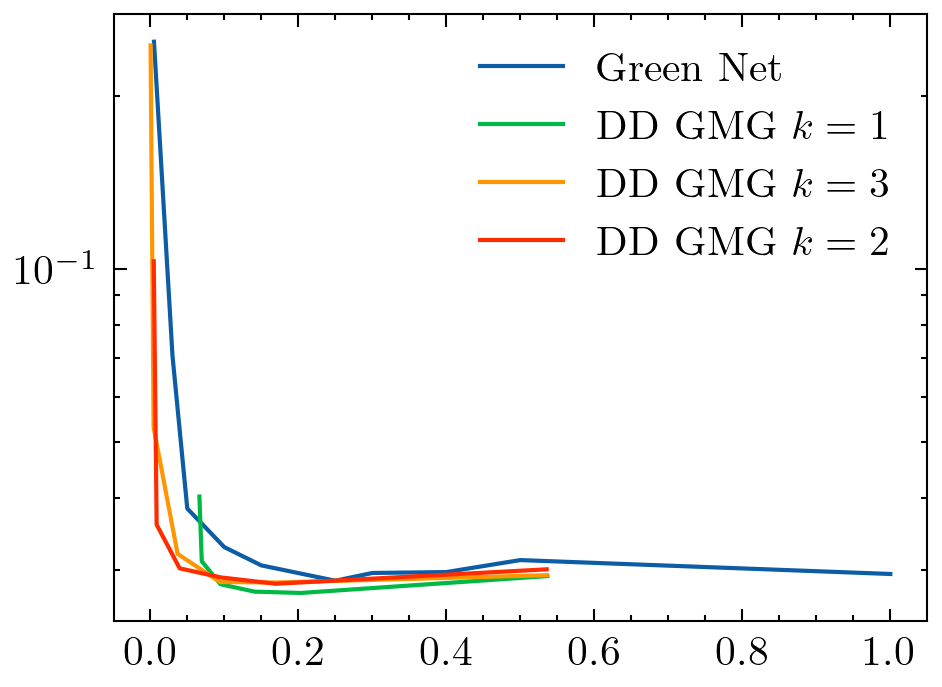

In [6]:
plt.plot(gn2d_poisson.p, gn2d_poisson.rl2, label='Green Net')
plt.plot(ddgmg2d_poisson_k1.p, ddgmg2d_poisson_k1.rl2, label='DD GMG $k=1$')
plt.plot(ddgmg2d_poisson_k3.p, ddgmg2d_poisson_k3.rl2, label='DD GMG $k=3$')
plt.plot(ddgmg2d_poisson_k2.p, ddgmg2d_poisson_k2.rl2, label='DD GMG $k=2$')
# plt.plot(ddgmg2d_poisson_k7.p, ddgmg2d_poisson_k7.rl2, label='DD GMG $k=7$')
# plt.ylim([5e-4, 5e-3])
# plt.xlim([0, .5])

plt.legend()
plt.yscale('log')

In [7]:
gn1d_poisson = fetch_subdf(exp_df, task_nm='poisson', model_nm='GN1D')
ddgmg1d_poisson_k1 = fetch_subdf(exp_df, task_nm='poisson', model_nm='DD_GMGN1D', k=1)
ddgmg1d_poisson_k3 = fetch_subdf(exp_df, task_nm='poisson', model_nm='DD_GMGN1D', k=3)
ddgmg1d_poisson_k5 = fetch_subdf(exp_df, task_nm='poisson', model_nm='DD_GMGN1D', k=5)
ddgmg1d_poisson_k7 = fetch_subdf(exp_df, task_nm='poisson', model_nm='DD_GMGN1D', k=7)

 $$ p_{j,k}^{n+1} \ = \ c_j^2 \mathrm{d}t^2 \left[ \partial_x^2 p + \partial_z^2 p \right]

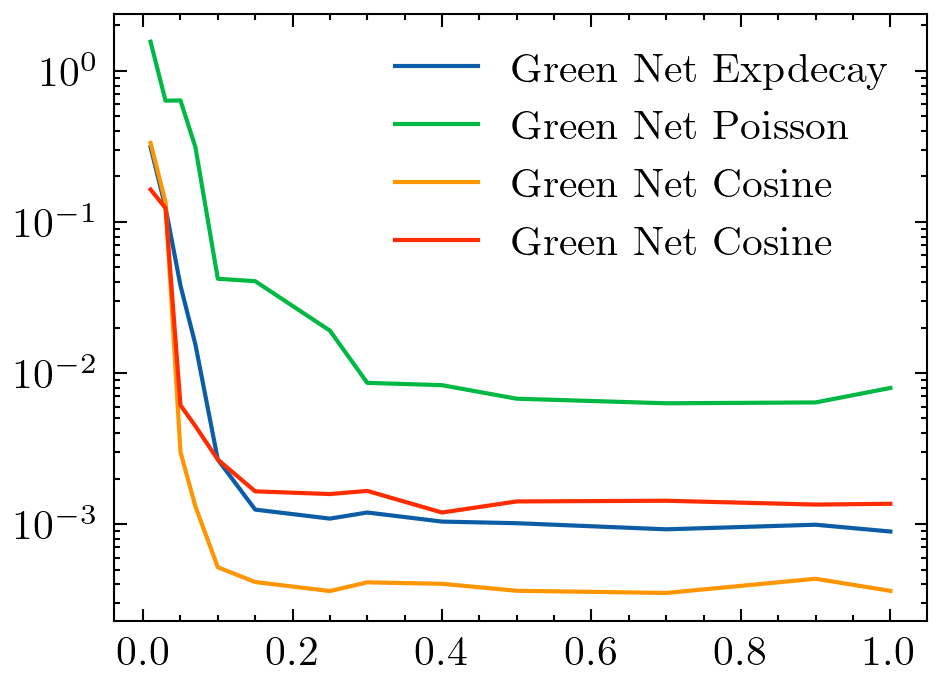

In [8]:
plt.plot(gn1d_poisson.p, gn1d_poisson.rl2, label='Green Net Expdecay')
plt.plot(gn1d_expdecay.p, gn1d_expdecay.rl2, label='Green Net Poisson')
plt.plot(gn1d_cosine.p, gn1d_cosine.rl2, label='Green Net Cosine')
plt.plot(gn1d_logarithm.p, gn1d_logarithm.rl2, label='Green Net Cosine')
plt.legend()
plt.yscale('log')

In [9]:
# plt.plot(gn1d_expdecay.p, gn1d_expdecay.rl2, label='Green Net')
# # plt.xlim([-0.01, 0.15])
# plt.legend()
# plt.yscale('log')

In [16]:
ddgmg1d_poisson_k5.rl2

133   3.2334e-03
134   1.5177e-03
136   1.3859e-03
138   1.3298e-03
139   1.3007e-03
135   1.1481e-03
137   1.0811e-03
Name: rl2, dtype: float64

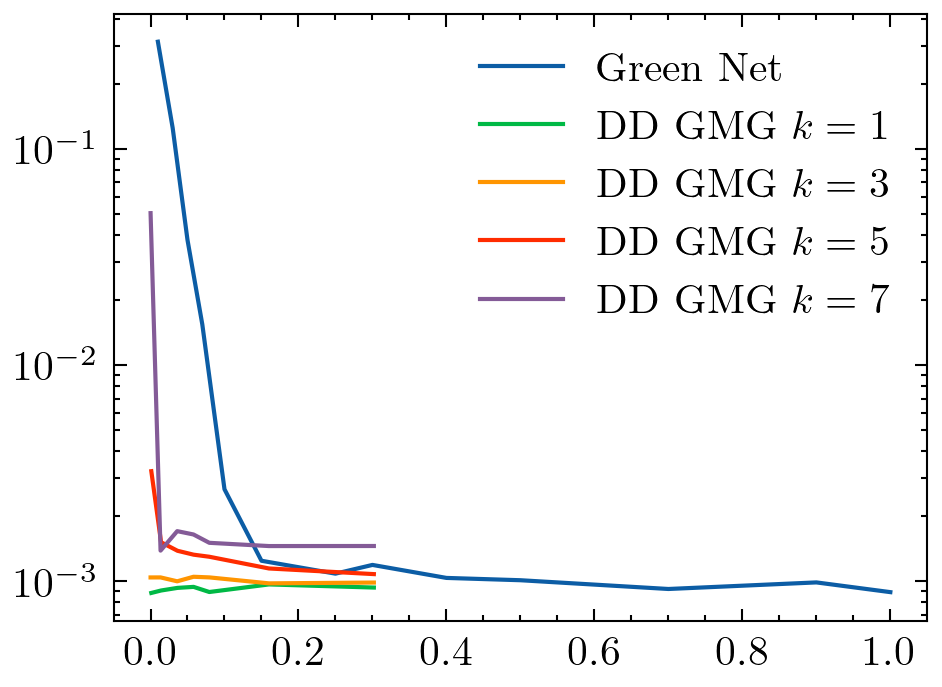

In [10]:
plt.plot(gn1d_poisson.p, gn1d_poisson.rl2, label='Green Net')
plt.plot(ddgmg1d_poisson_k5.p, ddgmg1d_poisson_k1.rl2, label='DD GMG $k=1$')
plt.plot(ddgmg1d_poisson_k7.p, ddgmg1d_poisson_k3.rl2, label='DD GMG $k=3$')
plt.plot(ddgmg1d_poisson_k5.p, ddgmg1d_poisson_k5.rl2, label='DD GMG $k=5$')
plt.plot(ddgmg1d_poisson_k7.p, ddgmg1d_poisson_k7.rl2, label='DD GMG $k=7$')
# plt.ylim([5e-4, 5e-3])
# plt.xlim([0, .5])

plt.legend()
plt.yscale('log')
# plt.xscale('log')

In [4]:
exp_hists = sorted(glob.glob('../results/*/*/hist.csv'))
# exp_kernels = glob.glob('../results/*/*/approx_kernel.npy')

In [5]:
model_nm=None
act='relu'
res=None, 
h=50
k=None
m=None
p=None 
seed=None

In [8]:
cond = exp_df.task_nm == 'poisson'
if model_nm is not None:
    cond = cond & (exp_df.model_nm == model_nm)

# if act is not None:
#     cond = cond & (exp_df.act == act)

# if res is not None:
#     cond = cond & (exp_df.res == res)

# if h is not None:
#     cond = cond & (exp_df.h == h)

# if k is not None:
#     cond = cond & (exp_df.k == k)

# if m is not None:
#     cond = cond & (exp_df.m == m)

# if p is not None:
#     cond = cond & (exp_df.p == p)

# if p is not None:
#     cond = cond & (exp_df.seed == seed)

In [11]:
exp_df.task_nm

Series([], Name: task_nm, dtype: object)

In [17]:
settings

['GN1D', 'relu', '513', '50', '0.0100', '0']

In [14]:
exp_hist.split('/')

['..', 'results', 'cosine', 'GN1D-relu-513-50-0.0100-0', 'hist.csv']

In [3]:
test_rl2_dict = {}
task_nm_lst = []
method_nm_lst = []
seed_lst = []
rl2_lst = []
k_lst = []
m_lst = []
r_lst = []
h_lst = []
act_lst = []
train_lst = []

for exp_hist in exp_hists:
    hist_df = pd.read_csv(exp_hist)
    task_nm = exp_hist.split('/')[2]

    if 'DD_GMGN1D' in exp_hist:
        method_nm, act, res, h, k, m, seed = exp_hist.split('/')[3].split('-')[:7]
    elif 'DD_GMGN2D' in exp_hist:
        method_nm, act, res, h, k, m, seed = exp_hist.split('/')[3].split('-')[:7]
    elif 'Toep_GMGN1D' in exp_hist:
        method_nm, act, res, h, k, m, seed = exp_hist.split('/')[3].split('-')[:7]
    elif 'Toep_GMGN2D' in exp_hist:
        method_nm, act, res, h, k, m, seed = exp_hist.split('/')[3].split('-')[:7]
    elif 'GN1D' in exp_hist:
        method_nm, act, res, h, seed = exp_hist.split('/')[3].split('-')[:5]
        k, m = 0, 0
    elif 'GN2D' in exp_hist:
        method_nm, act, res, h, seed = exp_hist.split('/')[3].split('-')[:5]
        k, m = 0, 0
    else:
        continue
    
    k, m, h = int(k), int(m), int(h)  


    task_nm_lst.append(task_nm)
    method_nm_lst.append(method_nm)
    seed_lst.append(seed)
    rl2_lst.append(hist_df.test_rl2.iloc[-1])
    k_lst.append(k)
    m_lst.append(m)
    h_lst.append(h)
    r_lst.append(res)
    act_lst.append(act)
    train_lst.append(hist_df.train_rl2)

test_rl2_dict = {
    'rl2' : rl2_lst, 
    'task' : task_nm_lst,
    'method' : method_nm_lst,
    'seed' : seed_lst,
    'act' : act_lst,
    'train' : train_lst,
    'r' : r_lst,
    'k' : k_lst,
    'm' : m_lst,
    'h' : h_lst,
}

test_rl2_df = pd.DataFrame(test_rl2_dict)

In [4]:
def plot_m_trend(df, task_nm, method_nm, res, act):
    pparam = dict(xlabel='$m$', ylabel=r'Relative error')
    fig, ax = plt.subplots()
    for k in [1, 3]:
        sub_df = df[
            (df.method == method_nm) & \
            (test_rl2_df.task == task_nm) & \
            (test_rl2_df.k == k) & \
            (test_rl2_df.act == act) & \
            (test_rl2_df.r == res)].sort_values(by='m')
        rl2_df = sub_df.groupby(['m']).agg({'rl2':'mean'})
        ax.plot(rl2_df.index.values, rl2_df['rl2'].values, label=k)

    # ax.autoscale(tight=True)
    ax.set_yscale('log')
    ax.legend(title='coarse level')
    ax.set(**pparam)  
    return sub_df

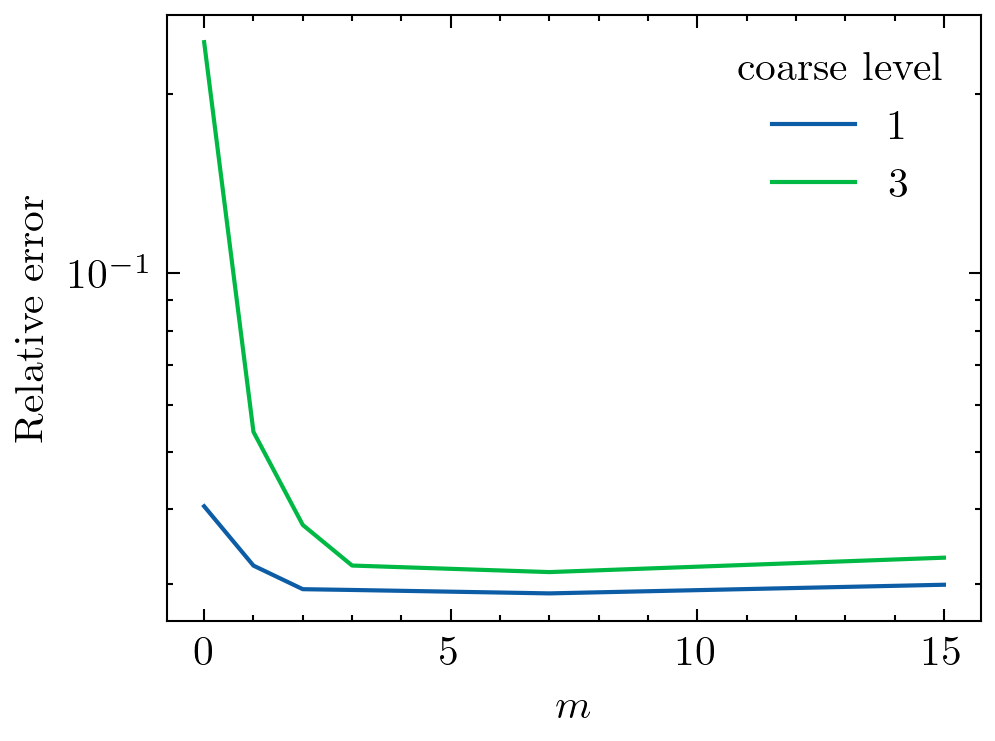

In [5]:
sub_df = plot_m_trend(test_rl2_df, 'poisson', 'DD_GMGN2D', '65x65', 'relu')

In [6]:
# plt.plot(np.stack(test_rl2_df[(test_rl2_df.task == 'expdecay') & (test_rl2_df.method == 'GN1D') & (test_rl2_df.k==3) & (test_rl2_df.m==3)].train.values).T.mean(axis=1))
# plt.yscale('log')

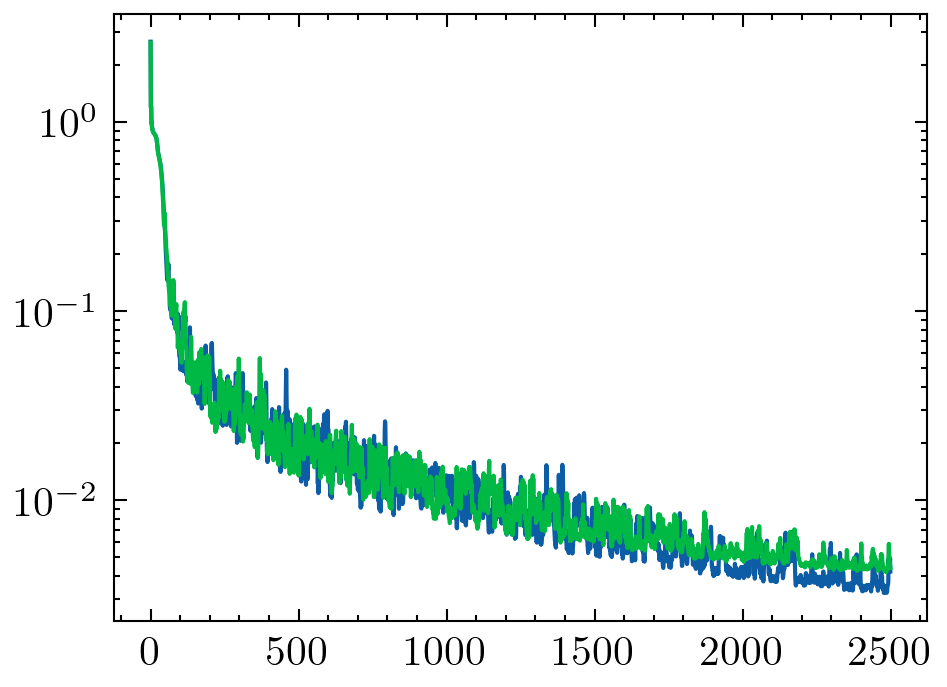

In [7]:
plt.plot(test_rl2_df[(test_rl2_df.task == 'expdecay') & (test_rl2_df.method == 'DD_GMGN1D') & (test_rl2_df.m == 31)].train.values[1])
plt.plot(test_rl2_df[(test_rl2_df.task == 'expdecay') & (test_rl2_df.method == 'DD_GMGN1D')].train.values[1])
plt.yscale('log')


In [15]:
test_rl2_df[(test_rl2_df.task == 'expdecay') & (test_rl2_df.method == 'GN1D') ].groupby(['task', 'act', 'method', 'r', 'k', 'm', 'h']).agg({'rl2':'mean', 'seed':'count'})

rl2  seed
task     act  method r    k m h                  
expdecay relu GN1D   1025 0 0 50 8.7137e-03     5
                     2049 0 0 50 8.1526e-03     4
                     4097 0 0 50 8.2595e-03     3
                     513  0 0 50 9.1415e-03     3

In [22]:
test_rl2_df[(test_rl2_df.task == 'poisson') & (test_rl2_df.method == 'DD_GMGN1D') & (test_rl2_df.r == '513') ].groupby(['task', 'act', 'method', 'r', 'k', 'm', 'h']).agg({'rl2':'mean', 'seed':'count'})

,,,,,,,rl2,seed
task,act,method,r,k,m,h,,


In [23]:
test_rl2_df[(test_rl2_df.task == 'poisson') & (test_rl2_df.method == 'GN2D') ].groupby(['task', 'act', 'method', 'r', 'k', 'm', 'h']).agg({'rl2':'mean', 'seed':'count'})

,,,,,,,rl2,seed
task,act,method,r,k,m,h,,
poisson,relu,GN2D,65x65,0,0,50,3.1064e-02,5


In [24]:
test_rl2_df[(test_rl2_df.task == 'poisson') & (test_rl2_df.method == 'DD_GMGN2D') ].groupby(['task', 'act', 'method', 'r', 'k', 'm', 'h']).agg({'rl2':'mean', 'seed':'count'})

rl2  seed
task    act  method    r     k m  h                  
poisson relu DD_GMGN2D 65x65 1 0  50 4.0498e-02     3
                               1  50 3.2181e-02     3
                               2  50 2.9373e-02     3
                               3  50 2.9285e-02     3
                               7  50 2.8899e-02     3
                               15 50 2.9883e-02     3
                             2 0  50 1.0369e-01     3
                               1  50 3.7462e-02     3
                               2  50 3.1334e-02     3
                               3  50 2.9758e-02     3
                               7  50 2.9904e-02     3
                               15 50 2.9963e-02     3
                             3 0  50 2.4441e-01     3
                               1  50 5.4117e-02     3
                               2  50 3.7674e-02     4
                               3  50 3.2189e-02     4
                               7  50 3.1384e-02     4
                               15 50 3.3185e-02     4

In [25]:
test_rl2_df[(test_rl2_df.task == 'invdist') & (test_rl2_df.method == 'GN2D') ].groupby(['task', 'act', 'method', 'r', 'k', 'm', 'h']).agg({'rl2':'mean', 'seed':'count'})

,,,,,,,rl2,seed
task,act,method,r,k,m,h,,
invdist,relu,GN2D,65x65,0,0,50,4.3350e-02,5


In [26]:
test_rl2_df[(test_rl2_df.task == 'invdist') & (test_rl2_df.method == 'Toep_GMGN2D') ].groupby(['task', 'act', 'method', 'r', 'k', 'm', 'h']).agg({'rl2':'mean', 'seed':'count'})

rl2  seed
task    act  method      r     k m  h                  
invdist relu Toep_GMGN2D 65x65 0 0  50 8.2831e-03     5
                                 1  50 8.2831e-03     5
                                 3  50 8.2831e-03     5
                                 5  50 8.2831e-03     5
                                 7  50 8.2831e-03     5
                                 15 50 8.2831e-03     5
                               1 0  50 8.3067e-03     5
                                 1  50 8.4072e-03     5
                                 3  50 8.3326e-03     5
                                 5  50 8.3379e-03     5
                                 7  50 8.3395e-03     5
                                 15 50 8.3489e-03     5
                               2 0  50 2.5743e-02     5
                                 1  50 8.6646e-03     5
                                 3  50 8.3548e-03     5
                                 5  50 8.3098e-03     5
                                 7  50 8.3553e-03     5
                                 15 50 8.2867e-03     5
                               3 0  50 2.7637e-01     5
                                 1  50 1.5219e-02     5
                                 3  50 9.0341e-03     5
                                 5  50 8.2614e-03     5
                                 7  50 8.2705e-03     5

Cosine - 513

In [27]:
l = 9
n = 2**l+1
s = 2**(l-1)
x = torch.linspace(-1,1,2*n-1)

A_gt = torch.cos(torch.linspace(-1,1,2*n-1).abs())
A_tgl = np.load('../results/logarithm_513/toep_gl-relu-0/approx_kernel.npy') * s
A_tgmg = np.load('../results/logarithm_513/toep_mg-3-7-0/approx_kernel.npy') * s

hist_tgl = pd.read_csv('../results/logarithm_513/toep_gl-relu-0/hist.csv')
hist_tgmg = pd.read_csv('../results/logarithm_513/toep_mg-3-7-0/hist.csv')
hist_fno = pd.read_csv('../results/logarithm_513/fno-0/hist.csv')


FileNotFoundError: [Errno 2] No such file or directory: '../results/logarithm_513/toep_gl-relu-0/approx_kernel.npy'

Logarithm - 513

In [ ]:
l = 9
n = 2**l+1
s = 2**(l-1)
x = torch.linspace(-1,1,2*n-1)
k = 7
m = 0

if n == 32769:
    posinf = 11.09
elif n == 8193:
    posinf = 9.07
else:
    posinf = 6.9

A_gt = torch.nan_to_num(-torch.log(torch.linspace(-1,1,2*n-1).abs()), posinf=posinf)
A_tgl = np.load('../results/logarithm_513/toep_gl-relu-0/approx_kernel.npy') * s
A_tgmg = np.load('../results/logarithm_513/toep_mg-3-0-0/approx_kernel.npy') * s
A_tgmg7 = np.load('../results/logarithm_513/toep_mg-3-7-0/approx_kernel.npy') * s

hist_tgl = pd.read_csv('../results/logarithm_513/toep_gl-relu-0/hist.csv')
hist_tgmg = pd.read_csv('../results/logarithm_513/toep_mg-3-0-0/hist.csv')
hist_tgmg7 = pd.read_csv('../results/logarithm_513/toep_mg-3-7-0/hist.csv')
hist_fno = pd.read_csv('../results/logarithm_513/fno-0/hist.csv')

Visualize Kernel

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x, A_gt, '-k', label='analytic')
ax.plot(x, A_tgmg, '-g', label='TGMG-m0')
ax.plot(x, A_tgmg7, '-r', label='TGMG-m7')
ax.plot(x, A_tgl, '-b', label='TGL')


axins = ax.inset_axes([-.3, 0.3, 0.6, 0.6], xlim=(-0.1, 0.1), ylim=(2,10))
axins.plot(x, A_gt, '-k', label='analytic')
axins.plot(x, A_tgl, '-b', label='TGL')
axins.plot(x, A_tgmg7, '-r', label='TGMG-m7')
axins.plot(x, A_tgmg, '-g', label='TGMG-m0')

ax.indicate_inset_zoom(axins)
ax.legend()

Training Dynamics

In [ ]:
# plt.plot(hist_gl.test_rl2, '-k', label='GL')
plt.plot(hist_tgl.test_rl2, '-b', label='TGL')
plt.plot(hist_tgmg.test_rl2, '-g', label='TGMG-m0')
plt.plot(hist_tgmg7.test_rl2, '-m', label='TGMG-m7')
plt.plot(hist_fno.test_rl2, '-r', label='FNO')
plt.legend()
plt.yscale('log')
# plt.ylim([0, 0.001])
plt.minorticks_on()

In [ ]:
matrl2_error(torch.tensor(A_tgmg7[None]), torch.tensor(A_gt[None]))

In [ ]:
matrl2_error(torch.tensor(A_tgl[None]), torch.tensor(A_gt[None]))

In [ ]:
matrl2_error(torch.tensor(A_tgmg[None]), torch.tensor(A_gt[None]))

Laplace - 513

In [ ]:
l = 13
n = 2**l+1
s = 2**l
x = torch.linspace(0,1,n)

raw_data = scipy.io.loadmat(f'../../pde_data/green_learning/data1d_{n}/laplace.mat')
xh, yh = raw_data['X'], raw_data['Y']
x, y = np.meshgrid(xh, yh)
K_gt = eval(raw_data['ExactGreen'][0]).T

K_lrgl = np.load(f'../results/laplace_{n}/lr_gl-relu-16-0/approx_kernel.npy')[0] * s
K_gmg = np.load(f'../results/laplace_{n}/dd_mg-7-7-0/approx_kernel.npy')[0]*2
K_lrgmg = np.load(f'../results/laplace_{n}/lrdd_mg-5-7-16-0/approx_kernel.npy')[0,0]*2

# hist_gl = pd.read_csv('../results/laplace_513/gl-relu-0/hist.csv')
# hist_gmg = pd.read_csv('../results/laplace_513/dd_mg-5-5-1/hist.csv')
# hist_fno = pd.read_csv('../results/laplace_513/fno-0/hist.csv')

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(16, 4), ncols=4)
gmg_fig = ax1.imshow(K_gmg, cmap='jet', vmax=K_gt.max(), vmin=K_gt.min())
ax1.set_title('GreenMG')
fig.colorbar(gmg_fig, ax=ax1, shrink=0.7)
lrgl_fig = ax2.imshow(K_lrgl, cmap='jet', vmax=K_gt.max(), vmin=K_gt.min())
fig.colorbar(lrgl_fig, ax=ax2, shrink=0.7)
ax2.set_title('LRGreenNet')
lrgmg_fig = ax3.imshow(K_lrgmg, cmap='jet', vmax=K_gt.max(), vmin=K_gt.min())
fig.colorbar(lrgmg_fig, ax=ax3, shrink=0.7)
ax3.set_title('LRGreenMG')
gt_fig = ax4.imshow(K_gt, cmap='jet', vmax=K_gt.max(), vmin=K_gt.min())
fig.colorbar(gt_fig, ax=ax4, shrink=0.7)
ax4.set_title('Analytic')
# err_fig = ax4.imshow(np.abs(K_gt-K_gmg), cmap='seismic')
# fig.colorbar(err_fig, ax=ax4, shrink=0.7)
# ax4.set_title('GreenMG-AbsError')

In [ ]:
idx = 5000
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x[0], K_gt[idx], '-k', label='analytic')
ax.plot(x[0], K_gmg[idx], '-g', label='GreenMG')
ax.plot(x[0], K_lrgl[idx], '-b', label='LRGreenNet')
ax.plot(x[0], K_lrgmg[idx], '-r', label='LRGreenMG')

# ax.set_xlim([0.49, 0.51])
# ax.set_ylim([0.22, 0.26])

In [ ]:
plt.plot(hist_gl.test_rl2, '-b', label='GreenNet')
plt.plot(hist_gmg.test_rl2, '-g', label='GreenMG')
plt.plot(hist_fno.test_rl2, '-r', label='FNO')
plt.legend()
plt.yscale('log')
plt.minorticks_on()

In [ ]:
matrl2_error(torch.tensor(K_gl[None]), torch.tensor(K_gt[None]))

In [ ]:
matrl2_error(torch.tensor(K_gmg[None]), torch.tensor(K_gt[None]))

Schrodinger - 513

In [ ]:
l = 9
n = 2**l+1
s = 2**l
x = torch.linspace(-1,1,2*n-1)

K_gmg = np.load('../results/schrodinger_513/dd_mg-1-3-1/approx_kernel.npy')[0] * s
K_gl = np.load('../results/schrodinger_513/dd_mg-1-3-1/approx_kernel.npy')[0] * s

# K_gmg = np.load('../results/interior_layer_513/dd_mg-0-0-1/approx_kernel.npy')[0] * s


hist_gl = pd.read_csv('../results/schrodinger_513/')
hist_gmg = pd.read_csv('../results/schrodinger_513/dd_mg-0-3-1/hist.csv')
hist_fno = pd.read_csv('../results/schrodinger_513/fno-0/hist.csv')

In [ ]:
plt.imshow(K_gmg)
plt.title('GreenMG')
plt.colorbar()

In [ ]:
plt.plot(hist_gmg.test_rl2, '-g', label='GreenMG')
plt.plot(hist_fno.test_rl2, '-r', label='FNO')
plt.legend()
plt.yscale('log')
plt.minorticks_on()